In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import load_img , ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
import zipfile
import os
import pickle
import time
import random
import tqdm
from google.colab import drive
import PIL
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
zip_file = '/content/drive/MyDrive/dataset.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()
print(os.listdir())

['.config', 'drive', 'mot.jpg', 'dataset', 'sample_data']


In [7]:
# Load time test

def get_time_read(dir_read):
  cur_time = time.time()
  num = 0
  list_dir = os.listdir(dir_read)
  print(list_dir)
  for cur_dir in list_dir:
    list_file = os.listdir(dir_read + '/' + cur_dir)
    for cur_file in list_file:
      img = Image.open(dir_read + '/' + cur_dir + '/' + cur_file)
      num += 1
  print('Number of uploaded images = ', num)
  print('Time spent = ', round(time.time() - cur_time, 2), 'sec')

In [8]:
zip_directory = 'dataset'

get_time_read(zip_directory)

['bicycle', 'motorcycle']
Number of uploaded images =  4000
Time spent =  0.41 sec


In [9]:
input_path = []
label = []

for class_name in os.listdir('dataset'):
  for path in os.listdir('dataset/' + class_name):
    if class_name == 'bicycle':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join('dataset', class_name, path))
print(input_path[0], label[0])

dataset/bicycle/image (1362).jpg 0


In [10]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,dataset/motorcycle/image (450).jpg,1
1,dataset/motorcycle/image (710).jpg,1
2,dataset/motorcycle/image (950).jpg,1
3,dataset/bicycle/image (1043).jpg,0
4,dataset/bicycle/image (492).jpg,0


In [11]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('motorcycle')
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

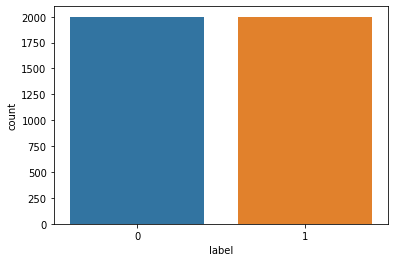

In [12]:
sns.countplot(df['label'])

In [13]:
df['label'] = df['label'].astype('str')

In [14]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col = 'images', 
    y_col = 'label', 
    target_size = (128, 128), 
    batch_size = 512, 
    class_mode = 'binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col = 'images', 
    y_col = 'label', 
    target_size = (128, 128), 
    batch_size = 512, 
    class_mode = 'binary'
)

Found 3200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


In [16]:
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [18]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
7/7 [==============================] - 70s 9s/step - loss: 0.9056 - accuracy: 0.5334 - val_loss: 0.5389 - val_accuracy: 0.8487
Epoch 2/10
7/7 [==============================] - 64s 10s/step - loss: 0.5283 - accuracy: 0.7191 - val_loss: 0.4430 - val_accuracy: 0.8575
Epoch 3/10
7/7 [==============================] - 64s 9s/step - loss: 0.3555 - accuracy: 0.8666 - val_loss: 0.5617 - val_accuracy: 0.8375
Epoch 4/10
7/7 [==============================] - 63s 9s/step - loss: 0.3013 - accuracy: 0.8859 - val_loss: 0.4144 - val_accuracy: 0.8562
Epoch 5/10
7/7 [==============================] - 64s 9s/step - loss: 0.2676 - accuracy: 0.8991 - val_loss: 0.2797 - val_accuracy: 0.8950
Epoch 6/10
7/7 [==============================] - 64s 9s/step - loss: 0.2440 - accuracy: 0.9066 - val_loss: 0.3341 - val_accuracy: 0.8737
Epoch 7/10
7/7 [==============================] - 78s 11s/step - loss: 0.2317 - accuracy: 0.9106 - val_loss: 0.2170 - val_accuracy: 0.9062
Epoch 8/10
7/7 [================

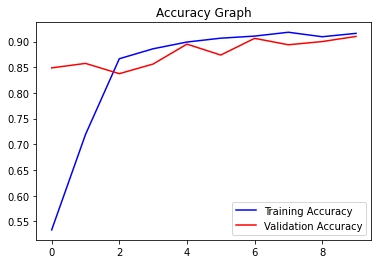

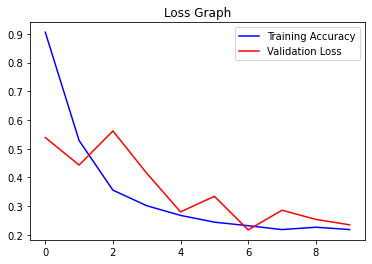

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()